In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.concat([pd.read_csv(f"data/{p}_baseline.csv") for p in ["lgp", "cgp"]], ignore_index=True)
df.rename(lambda x: x.replace("training.", "").replace("run_id", "seed"), axis="columns", inplace=True)
df["environment"] = df["environment"].apply(lambda x: x.replace("-", ""))
df.head()

,Unnamed: 0.1,Unnamed: 0,fitness_3q,evaluation_time,top_k_fit.top_1_fit,_runtime,seed,fitness_1q,generation,fitness_mean,fitness_median,fitness_std,_step,_timestamp,top_k_fit.top_0_fit,top_k_fit.top_2_fit,solver,environment,Unnamed: 0.2
0,0,0,289.529968,19.97117,688.193115,21.419822,0,555.956909,0,425.567230,349.372406,197.723236,0,1.686304e+09,791.839844,570.485779,lgp,ant,NaN
1,1,1,385.709930,19.97117,900.334290,21.718155,1,706.488403,0,492.084290,411.964294,316.435394,1,1.686304e+09,977.877319,706.535706,lgp,ant,NaN
2,2,2,296.074280,19.97117,706.784546,22.014669,2,639.220703,0,432.221771,446.778564,243.935150,2,1.686304e+09,707.024414,642.126221,lgp,ant,NaN
3,3,3,263.423767,19.97117,665.460815,22.313905,3,616.348022,0,416.506409,383.434418,222.942413,3,1.686304e+09,804.379517,658.898254,lgp,ant,NaN
4,4,4,302.902283,19.97117,704.192261,22.607100,4,675.323486,0,513.130981,544.031250,243.379929,4,1.686304e+09,997.036011,698.522766,lgp,ant,NaN


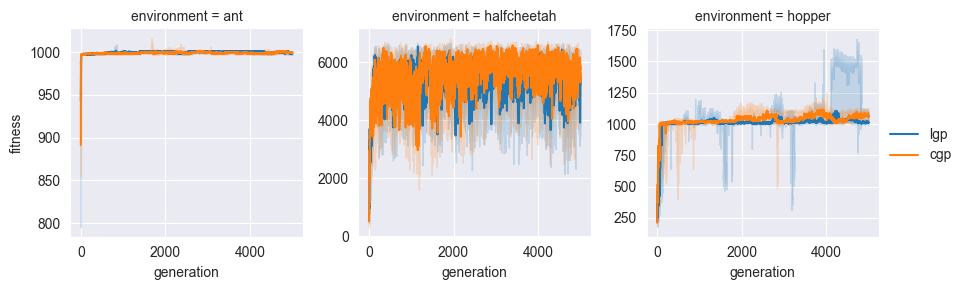

In [66]:
g = sns.FacetGrid(df, col="environment", sharey=False)
g.map_dataframe(sns.lineplot, x="generation", y="top_k_fit.top_0_fit", hue="solver",
                estimator="median", errorbar=("pi", 50))
g.set_xlabels("generation")
g.set_ylabels("fitness")
g.add_legend()
plt.show()

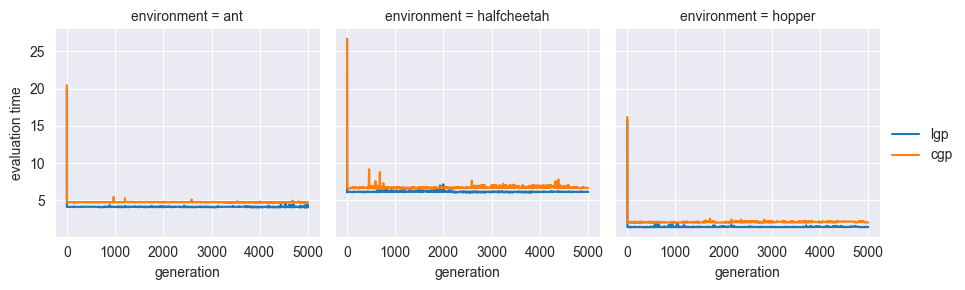

In [67]:
g = sns.FacetGrid(df, col="environment")
g.map_dataframe(sns.lineplot, x="generation", y="evaluation_time", estimator="median",
                errorbar=("pi", 50), hue="solver")
g.set_xlabels("generation")
g.set_ylabels("evaluation time")
g.add_legend()
plt.show()

In [68]:
graph_sizes = pd.read_csv("data/graph_sizes.csv")
graph_sizes["relative_size"] = graph_sizes["graph_size"] / graph_sizes["max_size"]
graph_sizes.head()

,seed,generation,graph_size,max_size,environment,solver,run_id,relative_size
0,1,799,24.0,61,hopper,cgp,9i011yqb,0.393443
1,5,1699,18.0,61,hopper,cgp,9i011yqb,0.295082
2,7,3999,17.0,61,hopper,cgp,9i011yqb,0.278689
3,6,4399,18.0,61,hopper,cgp,9i011yqb,0.295082
4,3,3199,18.0,61,hopper,cgp,9i011yqb,0.295082


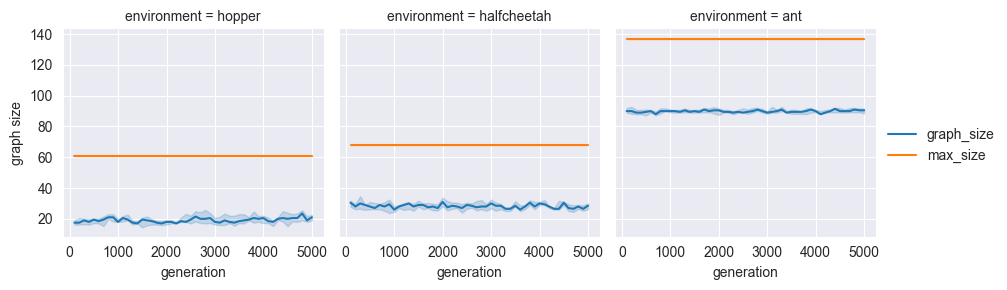

In [69]:
g = sns.FacetGrid(
    pd.melt(graph_sizes, id_vars=["generation", "seed", "environment", "solver"],
            value_vars=["graph_size", "max_size"]),
    col="environment")
g.map_dataframe(sns.lineplot, x="generation", y="value", estimator="median",
                errorbar=("pi", 50), hue="variable")
g.set_xlabels("generation")
g.set_ylabels("graph size")
g.add_legend()
plt.show()

In [70]:
join_df = graph_sizes.merge(df, on=["solver", "generation", "environment", "seed"])
max_gens = join_df.groupby(["solver", "environment", "seed"])["generation"].max().reset_index()
join_df = join_df.merge(max_gens, on=["solver", "generation", "environment", "seed"])
join_df.head(30)

,seed,generation,graph_size,max_size,environment,solver,run_id,relative_size,Unnamed: 0.1,Unnamed: 0,...,_runtime,fitness_1q,fitness_mean,fitness_median,fitness_std,_step,_timestamp,top_k_fit.top_0_fit,top_k_fit.top_2_fit,Unnamed: 0.2
0,2,4999,18.0,61,hopper,cgp,9i011yqb,0.295082,149992,49992,...,11143.691357,636.112183,359.941589,206.358856,393.588013,49992,1.686237e+09,1016.603271,723.801575,149992.0
1,4,4999,23.0,61,hopper,cgp,9i011yqb,0.377049,149994,49994,...,11143.720881,955.422729,409.689667,109.645042,465.887756,49994,1.686237e+09,1059.829346,1046.293091,149994.0
2,6,4999,13.0,61,hopper,cgp,9i011yqb,0.213115,149996,49996,...,11143.749516,1074.113770,570.897034,496.457153,485.656677,49996,1.686237e+09,1144.362183,1075.534546,149996.0
3,0,4999,21.0,61,hopper,cgp,9i011yqb,0.344262,149990,49990,...,11143.662047,775.803406,349.369904,46.554157,475.151398,49990,1.686237e+09,1130.598633,998.903320,149990.0
4,9,4999,21.0,61,hopper,cgp,9i011yqb,0.344262,149999,49999,...,11143.792366,950.969543,548.368347,707.238525,451.134064,49999,1.686237e+09,1114.513916,1015.277039,149999.0
5,8,4999,21.0,61,hopper,cgp,9i011yqb,0.344262,149998,49998,...,11143.777577,117.735130,247.555771,70.633636,373.281006,49998,1.686237e+09,1010.376221,133.325989,149998.0
6,3,4999,27.0,61,hopper,cgp,9i011yqb,0.442623,149993,49993,...,11143.706333,159.458191,198.355026,70.858620,289.899536,49993,1.686237e+09,1030.078003,162.045761,149993.0
7,5,4999,25.0,61,hopper,cgp,9i011yqb,0.409836,149995,49995,...,11143.735515,69.075317,233.093185,19.485455,420.504089,49995,1.686237e+09,1075.547363,77.782471,149995.0
8,7,4999,19.0,61,hopper,cgp,9i011yqb,0.311475,149997,49997,...,11143.763564,728.003357,354.611420,126.901520,410.743042,49997,1.686237e+09,1013.749084,874.907776,149997.0
9,1,4999,19.0,61,hopper,cgp,9i011yqb,0.311475,149991,49991,...,11143.676842,202.790619,297.637085,99.138046,408.783203,49991,1.686237e+09,1112.886230,217.720078,149991.0


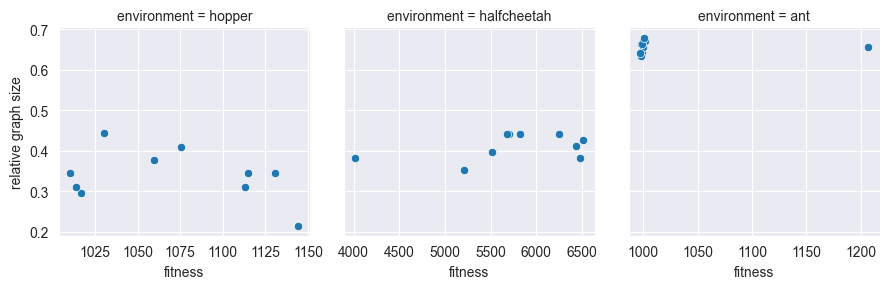

In [71]:
g = sns.FacetGrid(join_df, col="environment", sharex=False)
g.map_dataframe(sns.scatterplot, x="top_k_fit.top_0_fit", y="relative_size")
g.set_xlabels("fitness")
g.set_ylabels("relative graph size")
plt.show()